In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:300]
y_test = y_test[:300]
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (10000, 28, 28)
Test shape: (300, 28, 28)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(f"Flattened Train shape: {X_train_flat.shape}")
print(f"Flattened Test shape: {X_test_flat.shape}")

Flattened Train shape: (10000, 784)
Flattened Test shape: (300, 784)


In [ ]:
scaler = StandardScaler()
X_train_scalar = scaler.fit_transform(X_train_flat)
X_test_scalar = scaler.transform(X_test_flat)

In [ ]:
pca = PCA(n_components=400)
X_train_pca = pca.fit_transform(X_train_scalar)
X_test_pca = pca.transform(X_test_scalar)
print(X_train_pca.shape)
print(X_test_pca.shape)

(10000, 400)
(300, 400)


In [ ]:
X_train_reconst = pca.inverse_transform(X_train_pca)
X_train_reconst = X_train_reconst.reshape(-1, 28, 28)

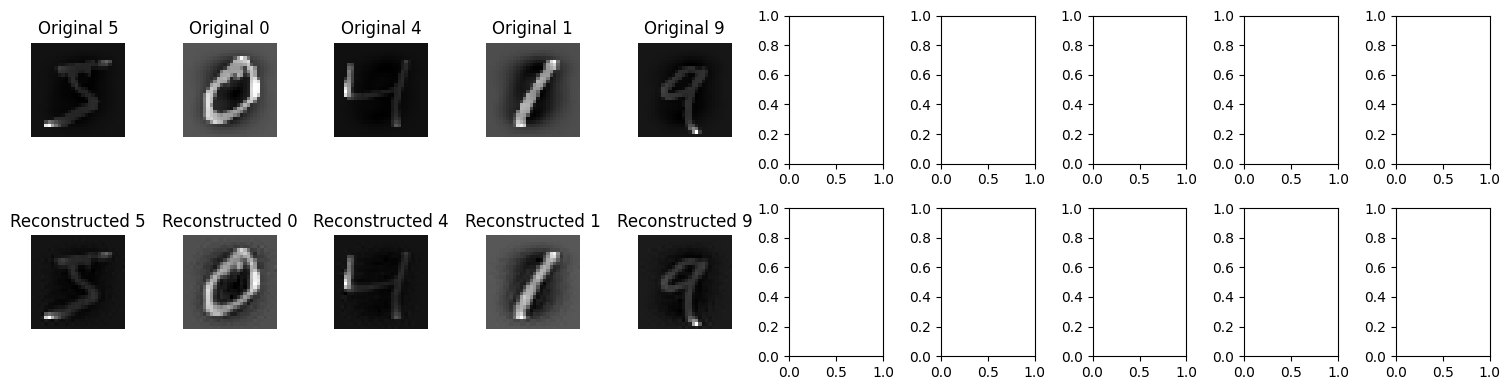

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(5):
    axes[0, i].imshow(X_train_scalar[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Original {y_train[i]}")

for i in range(5):
    axes[1, i].imshow(X_train_reconst[i], cmap='gray')  # No need to reshape as it's already 28x28
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Reconstructed {y_train[i]}")

plt.tight_layout()
plt.show()


In [ ]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance: {explained_variance:2f}")

Explained Variance: 0.979144


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9366666666666666
